In [1]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import pearsonr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

DMRcpgfile='/Users/irffanalahi/Research/Research_update/SM/ShowcaseSM/BL17_14/BL14_feature_significance/CD4/fromReftoPerfomance/singleCpGbased/everythingsinglecpg/BL14_all_matrixCin_nr0.4_imputed_rowmean.txt_bg_intesectedwith_CD4DMRofBL14atleast.2SM.txt' #'/Users/irffanalahi/Research/Research_update/SM/ShowcaseSM/BL17_14/BL14_feature_significance/mNeu/fromReftoPerfomance_singlecpgbased/everything_single_cpg/BL14_all_matrixCin_nr0.4_imputed_rowmean.txt_bg_intesectedwith_BL14mNeuDMRs_CW.7.txt'#'/Users/irffanalahi/Research/Research_update/SM/ShowcaseSM/BL17_14/BL14_feature_significance/CD4/fromReftoPerfomance/singleCpGbased/everythingsinglecpg/BL14_all_matrixCin_nr0.4_imputed_rowmean.txt_bg_intesectedwith_CD4DMRofBL14atleast.2SM.txt'
RDstatfile='/Users/irffanalahi/Research/Research_update/SM/ShowcaseSM/BL17_14/BL14_feature_significance/CD4/fromReftoPerfomance/singleCpGbased/everythingsinglecpg/mincpg1_feature_significance_Allfile_CpGwise_avg.txt' #'/Users/irffanalahi/Research/Research_update/SM/ShowcaseSM/BL17_14/BL14_feature_significance/mNeu/fromReftoPerfomance_singlecpgbased/everything_single_cpg/BL14_atleast.2_top-1_singleCpG_final_assignedref_uniq.txt_result_final.txt_folder_mincpg1_feature_significance_Allfile_CpGwise_avg.txt'#'/Users/irffanalahi/Research/Research_update/SM/ShowcaseSM/BL17_14/BL14_feature_significance/CD4/fromReftoPerfomance/singleCpGbased/everythingsinglecpg/mincpg1_feature_significance_Allfile_CpGwise_avg.txt'
celltype='CD4' #################################
cpgdf=pd.read_csv(DMRcpgfile,sep="\t",index_col=['chrom','start','end'])
cpgdf.head()

CD4       CD8        nB        NK        Mn  \
chrom start    end                                                          
chr1  32387132 32387134  0.214333  0.507000  0.992000  0.968333  0.968667   
      32387376 32387378  0.127000  0.633000  0.946667  0.881333  1.000000   
      32387403 32387405  0.136667  0.869333  0.958333  0.948667  1.000000   
      32387409 32387411  0.182333  0.969667  0.989667  0.990667  0.982333   
      32387417 32387419  0.666667  0.957333  0.980333  0.956333  1.000000   

                             mNeu      m8        DC      Eo      Tr      m4  \
chrom start    end                                                            
chr1  32387132 32387134  0.965667  0.9420  0.981000  0.9585  0.8695  0.9200   
      32387376 32387378  0.860000  0.8300  0.928000  0.7750  0.6930  0.7360   
      32387403 32387405  0.953667  0.8635  1.000000  0.9690  0.7770  0.7115   
      32387409 32387411  0.957333  0.9900  1.000000  1.0000  0.7570  0.7480   
      32387417 32387419  0.912667  1.0000  0.981333  0.9665  0.9300  0.9105   

                             Mg      Er        mB shouldbechrom       pos  \
chrom start    end                                                          
chr1  32387132 32387134  1.0000  0.9220  0.986000          chr1  32387133   
      32387376 32387378  0.8985  0.8945  0.895667          chr1  32387377   
      32387403 32387405  0.9355  0.9870  0.984667          chr1  32387404   
      32387409 32387411  0.9785  0.9880  0.953667          chr1  32387410   
      32387417 32387419  0.9630  0.9780  0.968000          chr1  32387418   

                        DMRchr  DMRstart    DMRend DMRname  
chrom start    end                                          
chr1  32387132 32387134   chr1  32387133  32387499   dmr13  
      32387376 32387378   chr1  32387133  32387499   dmr13  
      32387403 32387405   chr1  32387133  32387499   dmr13  
      32387409 32387411   chr1  32387133  32387499   dmr13  
      32387417 32387419   chr1  32387133  32387499   dmr13

In [2]:
RDstatdf=pd.read_csv(RDstatfile,sep="\t")
#RDstatdf.rename(columns={'chrom':'DMRchr','start':'DMRstart','end':'DMRend'},inplace=True)
RDstatdf.head()

,DMRchr,DMRstart,DMRend,chrom,start,end,#TP_fragment,#FP_fragment,#TN_fragment,#FN_fragment,#Total_Fragment,TPR,FPR,FDR
0,chr1,32387133,32387499,chr1,32387132,32387134,4.30,12.816667,268.083333,2.95,288.150000,0.700137,0.045649,0.830705
1,chr1,32387133,32387499,chr1,32387376,32387378,0.35,2.650000,76.850000,0.80,80.650000,0.283333,0.033441,0.899167
2,chr1,32387133,32387499,chr1,32387403,32387405,0.55,1.333333,101.750000,0.95,104.583333,0.350000,0.012920,0.846465
3,chr1,32387133,32387499,chr1,32387409,32387411,0.60,0.766667,102.216667,1.45,105.033333,0.253205,0.007570,0.771111
4,chr1,32387133,32387499,chr1,32387417,32387419,0.55,0.566667,109.933333,2.30,113.350000,0.164379,0.005158,0.743386


In [3]:
cpgdf=cpgdf.drop(['shouldbechrom','pos'],axis=1)
cpgdf.head()

CD4       CD8        nB        NK        Mn  \
chrom start    end                                                          
chr1  32387132 32387134  0.214333  0.507000  0.992000  0.968333  0.968667   
      32387376 32387378  0.127000  0.633000  0.946667  0.881333  1.000000   
      32387403 32387405  0.136667  0.869333  0.958333  0.948667  1.000000   
      32387409 32387411  0.182333  0.969667  0.989667  0.990667  0.982333   
      32387417 32387419  0.666667  0.957333  0.980333  0.956333  1.000000   

                             mNeu      m8        DC      Eo      Tr      m4  \
chrom start    end                                                            
chr1  32387132 32387134  0.965667  0.9420  0.981000  0.9585  0.8695  0.9200   
      32387376 32387378  0.860000  0.8300  0.928000  0.7750  0.6930  0.7360   
      32387403 32387405  0.953667  0.8635  1.000000  0.9690  0.7770  0.7115   
      32387409 32387411  0.957333  0.9900  1.000000  1.0000  0.7570  0.7480   
      32387417 32387419  0.912667  1.0000  0.981333  0.9665  0.9300  0.9105   

                             Mg      Er        mB DMRchr  DMRstart    DMRend  \
chrom start    end                                                             
chr1  32387132 32387134  1.0000  0.9220  0.986000   chr1  32387133  32387499   
      32387376 32387378  0.8985  0.8945  0.895667   chr1  32387133  32387499   
      32387403 32387405  0.9355  0.9870  0.984667   chr1  32387133  32387499   
      32387409 32387411  0.9785  0.9880  0.953667   chr1  32387133  32387499   
      32387417 32387419  0.9630  0.9780  0.968000   chr1  32387133  32387499   

                        DMRname  
chrom start    end               
chr1  32387132 32387134   dmr13  
      32387376 32387378   dmr13  
      32387403 32387405   dmr13  
      32387409 32387411   dmr13  
      32387417 32387419   dmr13

In [4]:
colnames=cpgdf.columns.tolist()
otherct=colnames[0:colnames.index('DMRchr')]
otherct.remove(celltype)
len(otherct)

13

In [5]:
otherct

['CD8',
 'nB',
 'NK',
 'Mn',
 'mNeu',
 'm8',
 'DC',
 'Eo',
 'Tr',
 'm4',
 'Mg',
 'Er',
 'mB']

In [6]:
othermean=cpgdf[otherct].mean(axis=1)
cpgdf['othermean']=othermean

In [7]:
cpgdf.head()

CD4       CD8        nB        NK        Mn  \
chrom start    end                                                          
chr1  32387132 32387134  0.214333  0.507000  0.992000  0.968333  0.968667   
      32387376 32387378  0.127000  0.633000  0.946667  0.881333  1.000000   
      32387403 32387405  0.136667  0.869333  0.958333  0.948667  1.000000   
      32387409 32387411  0.182333  0.969667  0.989667  0.990667  0.982333   
      32387417 32387419  0.666667  0.957333  0.980333  0.956333  1.000000   

                             mNeu      m8        DC      Eo      Tr      m4  \
chrom start    end                                                            
chr1  32387132 32387134  0.965667  0.9420  0.981000  0.9585  0.8695  0.9200   
      32387376 32387378  0.860000  0.8300  0.928000  0.7750  0.6930  0.7360   
      32387403 32387405  0.953667  0.8635  1.000000  0.9690  0.7770  0.7115   
      32387409 32387411  0.957333  0.9900  1.000000  1.0000  0.7570  0.7480   
      32387417 32387419  0.912667  1.0000  0.981333  0.9665  0.9300  0.9105   

                             Mg      Er        mB DMRchr  DMRstart    DMRend  \
chrom start    end                                                             
chr1  32387132 32387134  1.0000  0.9220  0.986000   chr1  32387133  32387499   
      32387376 32387378  0.8985  0.8945  0.895667   chr1  32387133  32387499   
      32387403 32387405  0.9355  0.9870  0.984667   chr1  32387133  32387499   
      32387409 32387411  0.9785  0.9880  0.953667   chr1  32387133  32387499   
      32387417 32387419  0.9630  0.9780  0.968000   chr1  32387133  32387499   

                        DMRname  othermean  
chrom start    end                          
chr1  32387132 32387134   dmr13   0.921590  
      32387376 32387378   dmr13   0.843974  
      32387403 32387405   dmr13   0.919859  
      32387409 32387411   dmr13   0.946526  
      32387417 32387419   dmr13   0.961846

In [8]:
cpgdf['1-othermean']=1-cpgdf['othermean']
cpgdf['1-'+celltype]=1-cpgdf[celltype]
cpgdf.head()

CD4       CD8        nB        NK        Mn  \
chrom start    end                                                          
chr1  32387132 32387134  0.214333  0.507000  0.992000  0.968333  0.968667   
      32387376 32387378  0.127000  0.633000  0.946667  0.881333  1.000000   
      32387403 32387405  0.136667  0.869333  0.958333  0.948667  1.000000   
      32387409 32387411  0.182333  0.969667  0.989667  0.990667  0.982333   
      32387417 32387419  0.666667  0.957333  0.980333  0.956333  1.000000   

                             mNeu      m8        DC      Eo      Tr  ...  \
chrom start    end                                                   ...   
chr1  32387132 32387134  0.965667  0.9420  0.981000  0.9585  0.8695  ...   
      32387376 32387378  0.860000  0.8300  0.928000  0.7750  0.6930  ...   
      32387403 32387405  0.953667  0.8635  1.000000  0.9690  0.7770  ...   
      32387409 32387411  0.957333  0.9900  1.000000  1.0000  0.7570  ...   
      32387417 32387419  0.912667  1.0000  0.981333  0.9665  0.9300  ...   

                             Mg      Er        mB  DMRchr  DMRstart    DMRend  \
chrom start    end                                                              
chr1  32387132 32387134  1.0000  0.9220  0.986000    chr1  32387133  32387499   
      32387376 32387378  0.8985  0.8945  0.895667    chr1  32387133  32387499   
      32387403 32387405  0.9355  0.9870  0.984667    chr1  32387133  32387499   
      32387409 32387411  0.9785  0.9880  0.953667    chr1  32387133  32387499   
      32387417 32387419  0.9630  0.9780  0.968000    chr1  32387133  32387499   

                         DMRname othermean  1-othermean     1-CD4  
chrom start    end                                                 
chr1  32387132 32387134    dmr13  0.921590     0.078410  0.785667  
      32387376 32387378    dmr13  0.843974     0.156026  0.873000  
      32387403 32387405    dmr13  0.919859     0.080141  0.863333  
      32387409 32387411    dmr13  0.946526     0.053474  0.817667  
      32387417 32387419    dmr13  0.961846     0.038154  0.333333  

[5 rows x 21 columns]

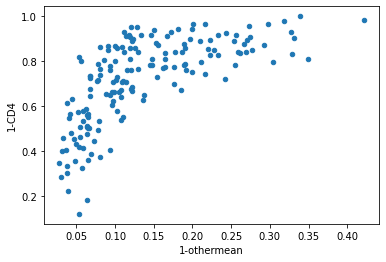

In [23]:
cpgdf.plot.scatter(x='1-othermean',y='1-'+celltype)
#plt.xlim([0.05,.5])
#plt.ylim([0.0,1])

In [10]:
cpgdf=cpgdf.merge(RDstatdf,on=['chrom','start','end'])
cpgdf.head()

,chrom,start,end,CD4,CD8,nB,NK,Mn,mNeu,m8,...,DMRstart_y,DMRend_y,#TP_fragment,#FP_fragment,#TN_fragment,#FN_fragment,#Total_Fragment,TPR,FPR,FDR
0,chr1,32387132,32387134,0.214333,0.507000,0.992000,0.968333,0.968667,0.965667,0.9420,...,32387133,32387499,4.30,12.816667,268.083333,2.95,288.150000,0.700137,0.045649,0.830705
1,chr1,32387376,32387378,0.127000,0.633000,0.946667,0.881333,1.000000,0.860000,0.8300,...,32387133,32387499,0.35,2.650000,76.850000,0.80,80.650000,0.283333,0.033441,0.899167
2,chr1,32387403,32387405,0.136667,0.869333,0.958333,0.948667,1.000000,0.953667,0.8635,...,32387133,32387499,0.55,1.333333,101.750000,0.95,104.583333,0.350000,0.012920,0.846465
3,chr1,32387409,32387411,0.182333,0.969667,0.989667,0.990667,0.982333,0.957333,0.9900,...,32387133,32387499,0.60,0.766667,102.216667,1.45,105.033333,0.253205,0.007570,0.771111
4,chr1,32387417,32387419,0.666667,0.957333,0.980333,0.956333,1.000000,0.912667,1.0000,...,32387133,32387499,0.55,0.566667,109.933333,2.30,113.350000,0.164379,0.005158,0.743386


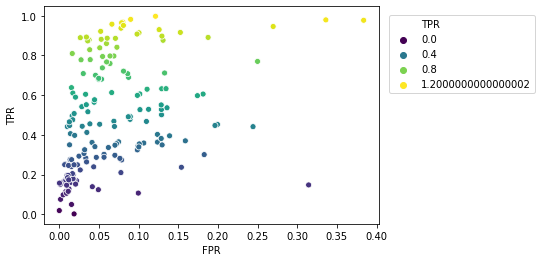

In [11]:

ax=sns.scatterplot(x='FPR',y='TPR', data=cpgdf, hue='TPR',palette="viridis")
ax.legend(loc=(1.03, 0.6))

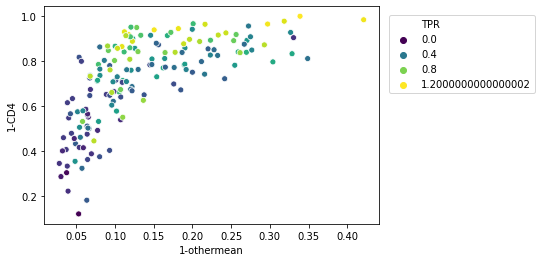

In [12]:
ax=sns.scatterplot(x='1-othermean',y='1-'+celltype, data=cpgdf, hue='TPR',palette="viridis")
ax.legend(loc=(1.03, 0.6))

In [13]:
def plt_corr(x, y,combined):
    fig = plt.figure()
    lm = sns.lmplot(x=x, y=y, data=combined)
    ax = lm.axes[0, 0]
    p_corr = np.around(corrdf_pearson[x][y], decimals=3)
    s_corr = np.around(corrdf_spearman[x][y], decimals=3)
    p_val_pearson = np.around(pearsonr(combined[x], combined[y])[1], decimals=8)
    p_val_spearman = np.around(spearmanr(combined[x], combined[y])[1], decimals=8)
    txt = 'r = ' + str(p_corr) + ', p-val = ' + str(p_val_pearson) + '\nrho = ' + str(s_corr) + ', p-val = ' + str(p_val_spearman)
    ax.text(np.array(combined[x].sort_values())[0], np.array(combined[y].sort_values())[-2], txt, horizontalalignment='left', verticalalignment='bottom')
    return lm

In [14]:

# sns.scatterplot(combined['FDR'], combined['FPR'])
corrdf_pearson=cpgdf.corr(method='pearson')
corrdf_spearman=cpgdf.corr(method='spearman')

<Figure size 432x288 with 0 Axes>

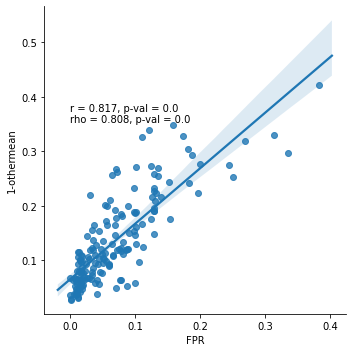

In [15]:
x = 'FPR'
y = '1-othermean'
fig = plt_corr(x, y,cpgdf)

<Figure size 432x288 with 0 Axes>

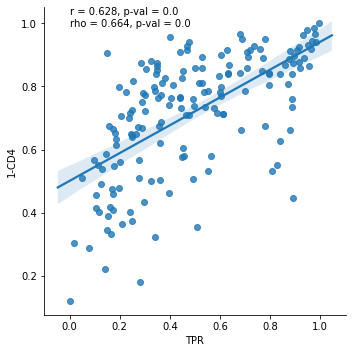

In [16]:
x = 'TPR'
y = '1-'+celltype
fig = plt_corr(x, y,cpgdf)

In [17]:
cpgdf.to_csv(DMRcpgfile+"_cpgdf.txt",sep="\t")

In [18]:
cpgtodmr=cpgdf.groupby('DMRname').mean()
cpgtodmr.head()

,start,end,CD4,CD8,nB,NK,Mn,mNeu,m8,DC,...,DMRstart_y,DMRend_y,#TP_fragment,#FP_fragment,#TN_fragment,#FN_fragment,#Total_Fragment,TPR,FPR,FDR
DMRname,,,,,,,,,,,,,,,,,,,,,
dmr1,9.038513e+07,9.038514e+07,0.115028,0.433333,0.968000,0.865000,0.957111,0.875278,0.836917,0.951611,...,90385110.0,90385156.0,3.200000,11.608333,100.636111,1.825000,117.269444,0.476040,0.104042,0.874107
dmr10,1.988436e+07,1.988437e+07,0.460926,0.924556,0.973259,0.952037,0.965444,0.952148,0.935333,0.960444,...,19884272.0,19884493.0,3.105556,8.535185,382.233333,4.427778,398.301852,0.257805,0.021954,0.850747
dmr11,1.516264e+07,1.516264e+07,0.391533,0.795533,0.961333,0.945600,0.929267,0.851000,0.892700,0.923667,...,15162551.0,15162685.0,1.700000,16.876667,274.166667,3.780000,296.523333,0.233863,0.055726,0.891448
dmr12,7.702964e+07,7.702964e+07,0.188030,0.554576,0.837364,0.837758,0.932970,0.883879,0.818227,0.895879,...,77029428.0,77029733.0,2.050000,23.165152,201.709091,1.345455,228.269697,0.450215,0.108957,0.935254
dmr13,3.238741e+07,3.238741e+07,0.352606,0.886636,0.971727,0.949818,0.987697,0.928364,0.943273,0.980515,...,32387133.0,32387499.0,0.822727,2.109091,123.093939,1.772727,127.798485,0.259891,0.013452,0.718857


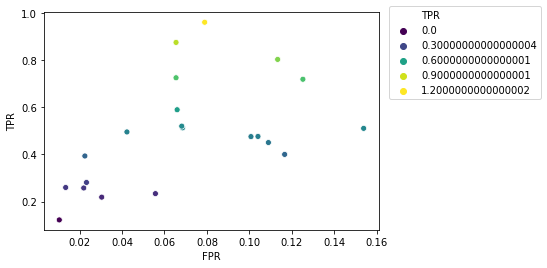

In [19]:
ax=sns.scatterplot(x='FPR',y='TPR', data=cpgtodmr, hue='TPR',palette="viridis")
ax.legend(loc=(1.03, 0.6))

In [20]:
cpgtodmr.to_csv(DMRcpgfile+"_cpgtodmr.txt",sep="\t")